In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

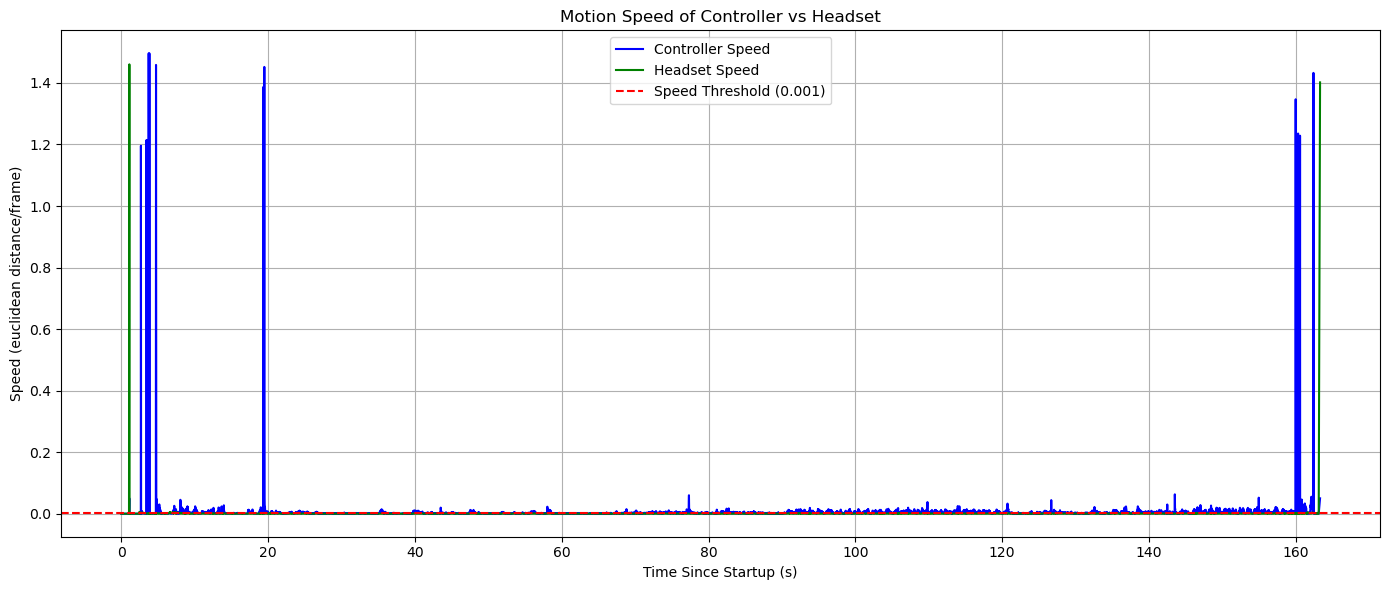

In [33]:
df = pd.read_csv("RightControllerData_20250721_143554.csv")

# --------- Controller Speed ----------
df["ctrl_dx"] = df["ControllerPosX"].diff()
df["ctrl_dy"] = df["ControllerPosY"].diff()
df["ctrl_dz"] = df["ControllerPosZ"].diff()
df["controller_speed"] = np.sqrt(df["ctrl_dx"]**2 + df["ctrl_dy"]**2 + df["ctrl_dz"]**2)

# --------- Headset Speed ----------
df["head_dx"] = df["HeadsetPosX"].diff()
df["head_dy"] = df["HeadsetPosY"].diff()
df["head_dz"] = df["HeadsetPosZ"].diff()
df["headset_speed"] = np.sqrt(df["head_dx"]**2 + df["head_dy"]**2 + df["head_dz"]**2)

# --------- Plot ----------
plt.figure(figsize=(14, 6))
plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Controller Speed", color='blue')
plt.plot(df["TimeSinceStartup"], df["headset_speed"], label="Headset Speed", color='green')
plt.axhline(0.001, color='red', linestyle='--', label='Speed Threshold (0.001)')
plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance/frame)")
plt.title("Motion Speed of Controller vs Headset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
df

,FrameNumber,TimeSinceStartup,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,...,ControllerRotZ,ControllerRotW,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed
0,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,0.0,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.02000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,0.0,1.00000,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
2,3,0.24959,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,0.0,1.00000,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
3,4,0.27748,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,0.0,1.00000,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
4,5,0.29251,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,0.0,1.00000,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227,8228,163.06330,0.68751,1.14719,-0.41711,0.04898,0.10503,-0.00301,0.99326,0.0,...,0.0,0.86603,0.0,0.00000,0.00000,0.000000,0.00013,-0.00034,-0.00069,0.000780
8228,8229,163.07650,0.68779,1.14698,-0.41772,0.05020,0.10499,-0.00327,0.99320,0.0,...,0.0,0.86603,0.0,0.00000,0.00000,0.000000,0.00028,-0.00021,-0.00061,0.000703
8229,8230,163.09170,0.68796,1.14713,-0.41806,0.05056,0.10542,-0.00350,0.99314,0.0,...,0.0,0.86603,0.0,0.00000,0.00000,0.000000,0.00017,0.00015,-0.00034,0.000409
8230,8231,163.11920,0.68802,1.14754,-0.41811,0.04966,0.10637,-0.00400,0.99308,0.0,...,0.0,0.86603,0.0,0.00000,0.00000,0.000000,0.00006,0.00041,-0.00005,0.000417


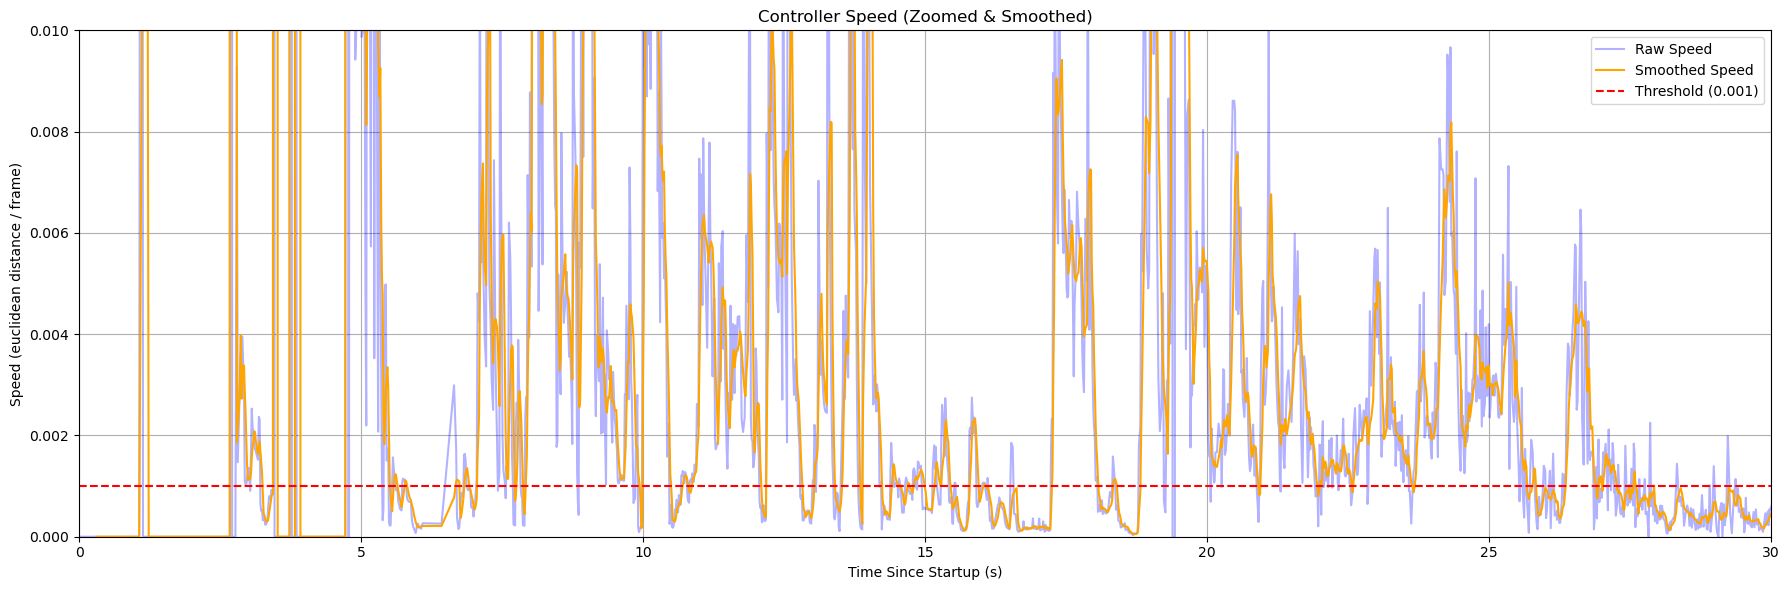

In [35]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(0, 30)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

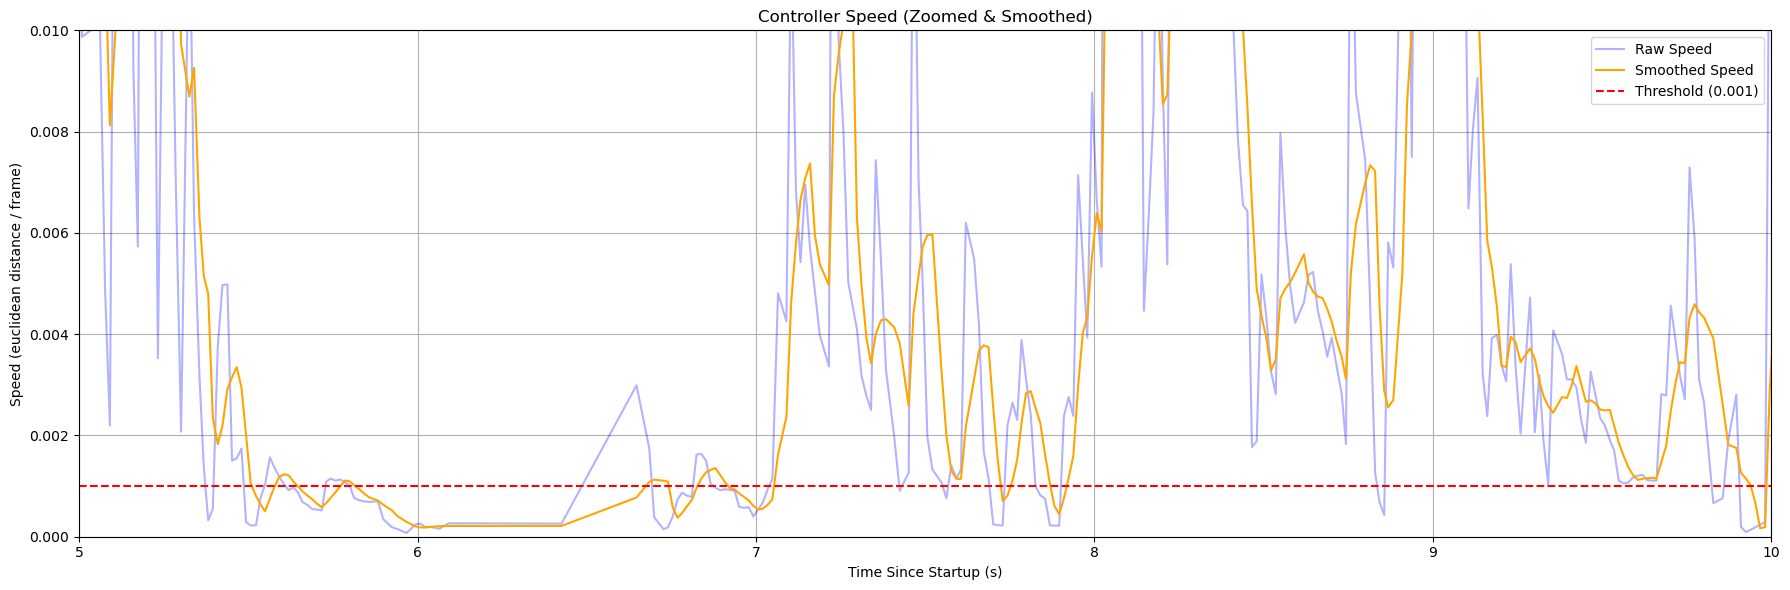

In [36]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(5, 10)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

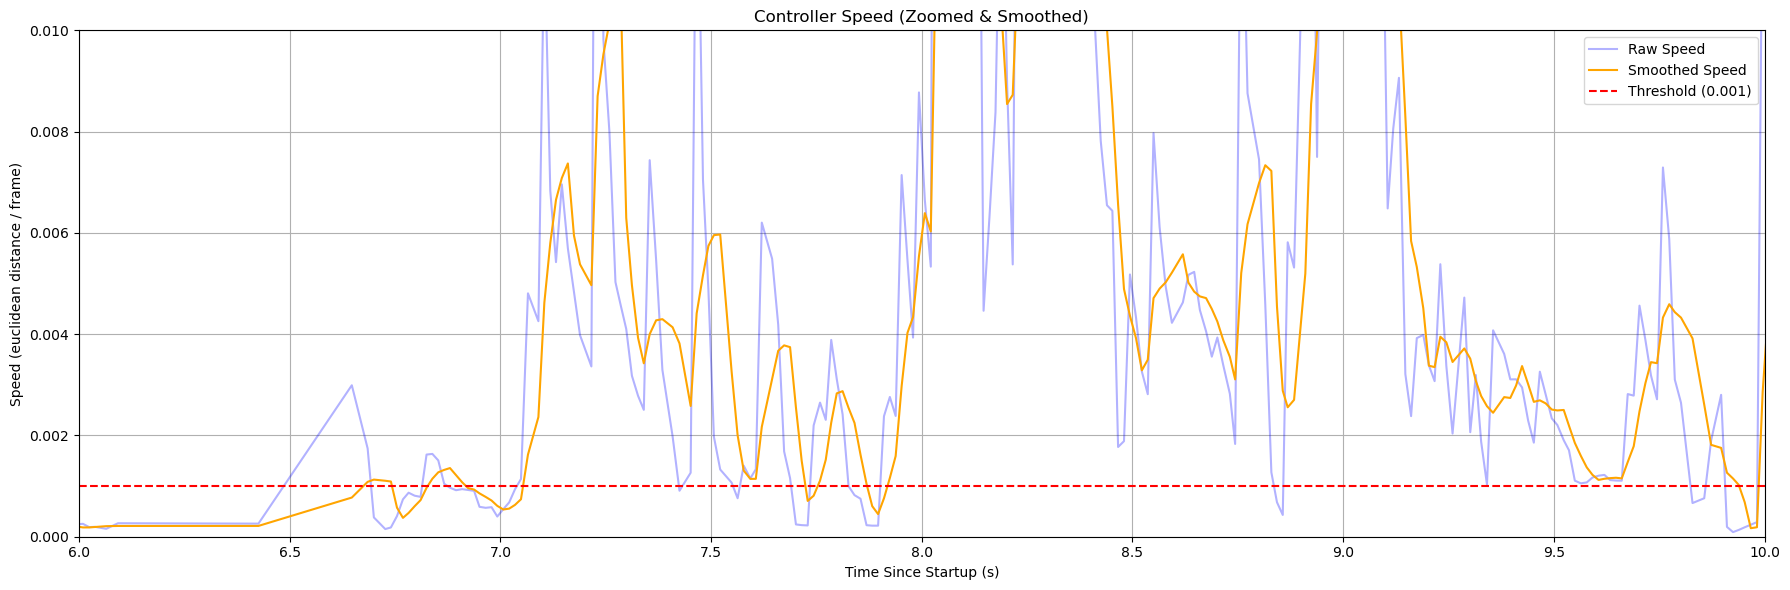

In [37]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(6, 10)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
offset_sec = 2.017
df['time_sec_aligned'] = df['TimeSinceStartup'] - offset_sec

print(df[['TimeSinceStartup', 'time_sec_aligned']].head())

   TimeSinceStartup  time_sec_aligned
0           0.00000          -2.01700
1           0.02000          -1.99700
2           0.24959          -1.76741
3           0.27748          -1.73952
4           0.29251          -1.72449


In [39]:
df

,FrameNumber,TimeSinceStartup,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,...,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned
0,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.01700
1,2,0.02000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.99700
2,3,0.24959,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.76741
3,4,0.27748,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.73952
4,5,0.29251,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.0,...,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.72449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227,8228,163.06330,0.68751,1.14719,-0.41711,0.04898,0.10503,-0.00301,0.99326,0.0,...,0.0,0.00000,0.00000,0.000000,0.00013,-0.00034,-0.00069,0.000780,0.00,161.04630
8228,8229,163.07650,0.68779,1.14698,-0.41772,0.05020,0.10499,-0.00327,0.99320,0.0,...,0.0,0.00000,0.00000,0.000000,0.00028,-0.00021,-0.00061,0.000703,0.00,161.05950
8229,8230,163.09170,0.68796,1.14713,-0.41806,0.05056,0.10542,-0.00350,0.99314,0.0,...,0.0,0.00000,0.00000,0.000000,0.00017,0.00015,-0.00034,0.000409,0.00,161.07470
8230,8231,163.11920,0.68802,1.14754,-0.41811,0.04966,0.10637,-0.00400,0.99308,0.0,...,0.0,0.00000,0.00000,0.000000,0.00006,0.00041,-0.00005,0.000417,0.00,161.10220


In [40]:
df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].isna().sum()

ControllerPosX    0
ControllerPosY    0
ControllerPosZ    0
dtype: int64

In [41]:
print("Missing values:")
print(df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].isna().sum())

print("\nZero values:")
print((df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']] == 0).sum())

diff = df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].diff()

diff['jump'] = np.sqrt(diff['ControllerPosX']**2 + diff['ControllerPosY']**2 + diff['ControllerPosZ']**2)

threshold = 1.0
outlier_frames = df.loc[diff['jump'] > threshold]

print(f"\nNumber of frames with jump > {threshold} m: {len(outlier_frames)}")

print("\nExample potential outliers:")
print(outlier_frames[['FrameNumber', 'ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].head())

Missing values:
ControllerPosX    0
ControllerPosY    0
ControllerPosZ    0
dtype: int64

Zero values:
ControllerPosX    271
ControllerPosY     52
ControllerPosZ     53
dtype: int64

Number of frames with jump > 1.0 m: 12

Example potential outliers:
     FrameNumber  ControllerPosX  ControllerPosY  ControllerPosZ
134          135         0.93843         0.60459        -0.35361
184          185         0.00000        -0.01964         0.04598
204          205         1.02116         0.90868        -0.53192
210          211         0.00000        -0.01964         0.04598
264          265         0.96836         0.92067        -0.50652


In [42]:
if 'time_sec_offset' in df.columns:
    df= df.drop(columns=['time_sec_offset'])

time_sec_offset = df['TimeSinceStartup'] - 2.017

time_idx = df.columns.get_loc('TimeSinceStartup')

df.insert(time_idx + 1, 'time_sec_offset', time_sec_offset)

df

,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned
0,1,0.00000,-2.01700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.01700
1,2,0.02000,-1.99700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.99700
2,3,0.24959,-1.76741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.76741
3,4,0.27748,-1.73952,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.73952
4,5,0.29251,-1.72449,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.0,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.72449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227,8228,163.06330,161.04630,0.68751,1.14719,-0.41711,0.04898,0.10503,-0.00301,0.99326,...,0.0,0.00000,0.00000,0.000000,0.00013,-0.00034,-0.00069,0.000780,0.00,161.04630
8228,8229,163.07650,161.05950,0.68779,1.14698,-0.41772,0.05020,0.10499,-0.00327,0.99320,...,0.0,0.00000,0.00000,0.000000,0.00028,-0.00021,-0.00061,0.000703,0.00,161.05950
8229,8230,163.09170,161.07470,0.68796,1.14713,-0.41806,0.05056,0.10542,-0.00350,0.99314,...,0.0,0.00000,0.00000,0.000000,0.00017,0.00015,-0.00034,0.000409,0.00,161.07470
8230,8231,163.11920,161.10220,0.68802,1.14754,-0.41811,0.04966,0.10637,-0.00400,0.99308,...,0.0,0.00000,0.00000,0.000000,0.00006,0.00041,-0.00005,0.000417,0.00,161.10220


In [43]:
df2 = pd.read_csv("hand_lable_02-test-02.csv")

print("Shape:", df.shape)
df2

Shape: (8232, 27)


,Observation id,Observation date,Description,Observation duration,Observation type,Source,Time offset (s),Media duration (s),FPS,Subject,Behavior,Behavioral category,Behavior type,Time,Media file name,Image index,Image file path,Comment
0,02-test-02,2025-07-27 20:06:55.052,NaN,141.384,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,164.333,60.0,NaN,hold,NaN,START,16.283,D:/Data Science/UOB/DS_project/Prototype/02-te...,977,NaN,NaN
1,02-test-02,2025-07-27 20:06:55.052,NaN,141.384,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,164.333,60.0,NaN,hold,NaN,STOP,21.483,D:/Data Science/UOB/DS_project/Prototype/02-te...,1289,NaN,NaN
2,02-test-02,2025-07-27 20:06:55.052,NaN,141.384,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,164.333,60.0,NaN,press,NaN,START,21.500,D:/Data Science/UOB/DS_project/Prototype/02-te...,1290,NaN,NaN
3,02-test-02,2025-07-27 20:06:55.052,NaN,141.384,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,164.333,60.0,NaN,press,NaN,STOP,22.367,D:/Data Science/UOB/DS_project/Prototype/02-te...,1342,NaN,NaN
4,02-test-02,2025-07-27 20:06:55.052,NaN,141.384,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,164.333,60.0,NaN,hold,NaN,START,22.383,D:/Data Science/UOB/DS_project/Prototype/02-te...,1343,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,02-test-02,2025-07-27 20:06:55.052,NaN,141.384,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,164.333,60.0,NaN,hold,NaN,STOP,154.867,D:/Data Science/UOB/DS_project/Prototype/02-te...,9292,NaN,NaN
172,02-test-02,2025-07-27 20:06:55.052,NaN,141.384,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,164.333,60.0,NaN,place,NaN,START,154.883,D:/Data Science/UOB/DS_project/Prototype/02-te...,9293,NaN,NaN
173,02-test-02,2025-07-27 20:06:55.052,NaN,141.384,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,164.333,60.0,NaN,place,NaN,STOP,156.133,D:/Data Science/UOB/DS_project/Prototype/02-te...,9368,NaN,NaN
174,02-test-02,2025-07-27 20:06:55.052,NaN,141.384,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,164.333,60.0,NaN,other,NaN,START,156.150,D:/Data Science/UOB/DS_project/Prototype/02-te...,9369,NaN,NaN


In [44]:
df_sub = df2[['Behavior', 'Behavior type', 'Time', 'Image index']]

df_start = df_sub[df_sub['Behavior type'] == 'START'].copy()
df_stop  = df_sub[df_sub['Behavior type'] == 'STOP'].copy()

df_start = df_start.reset_index(drop=True)
df_stop  = df_stop.reset_index(drop=True)

df_events = pd.DataFrame({
    'behavior': df_start['Behavior'],
    'start_time': df_start['Time'],
    'stop_time': df_stop['Time'],
    'start_image_index': df_start['Image index'],
    'stop_image_index': df_stop['Image index']
})

df_events

,behavior,start_time,stop_time,start_image_index,stop_image_index
0,hold,16.283,21.483,977,1289
1,press,21.500,22.367,1290,1342
2,hold,22.383,23.000,1343,1380
3,press,23.017,24.233,1381,1454
4,hold,24.250,25.217,1455,1513
...,...,...,...,...,...
83,hold,141.750,142.050,8505,8523
84,rotate,142.067,152.067,8524,9124
85,hold,152.083,154.867,9125,9292
86,place,154.883,156.133,9293,9368


In [45]:
df['behavior'] = np.nan

for _, row in df_events.iterrows():
    b = row['behavior']
    t_start = row['start_time']
    t_stop = row['stop_time']

    mask = (df['time_sec_offset'] >= t_start) & (df['time_sec_offset'] <= t_stop)

    df.loc[mask, 'behavior'] = b

df

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_29604/3175346181.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'hold' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'behavior'] = b


,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned,behavior
0,1,0.00000,-2.01700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.01700,NaN
1,2,0.02000,-1.99700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.99700,NaN
2,3,0.24959,-1.76741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.76741,NaN
3,4,0.27748,-1.73952,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.73952,NaN
4,5,0.29251,-1.72449,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-1.72449,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227,8228,163.06330,161.04630,0.68751,1.14719,-0.41711,0.04898,0.10503,-0.00301,0.99326,...,0.00000,0.00000,0.000000,0.00013,-0.00034,-0.00069,0.000780,0.00,161.04630,NaN
8228,8229,163.07650,161.05950,0.68779,1.14698,-0.41772,0.05020,0.10499,-0.00327,0.99320,...,0.00000,0.00000,0.000000,0.00028,-0.00021,-0.00061,0.000703,0.00,161.05950,NaN
8229,8230,163.09170,161.07470,0.68796,1.14713,-0.41806,0.05056,0.10542,-0.00350,0.99314,...,0.00000,0.00000,0.000000,0.00017,0.00015,-0.00034,0.000409,0.00,161.07470,NaN
8230,8231,163.11920,161.10220,0.68802,1.14754,-0.41811,0.04966,0.10637,-0.00400,0.99308,...,0.00000,0.00000,0.000000,0.00006,0.00041,-0.00005,0.000417,0.00,161.10220,NaN


In [46]:
print(df['behavior'].value_counts(dropna=False))

behavior
adjust    1801
rotate    1777
hold      1681
press     1500
NaN       1344
other       68
place       61
Name: count, dtype: int64


In [47]:
df[(df['time_sec_offset'] <= 21.500)][['TimeSinceStartup', 'time_sec_offset', 'behavior']]

,TimeSinceStartup,time_sec_offset,behavior
0,0.00000,-2.01700,NaN
1,0.02000,-1.99700,NaN
2,0.24959,-1.76741,NaN
3,0.27748,-1.73952,NaN
4,0.29251,-1.72449,NaN
...,...,...,...
1394,23.45336,21.43636,hold
1395,23.46722,21.45022,hold
1396,23.48067,21.46367,hold
1397,23.49472,21.47772,hold


In [48]:
df['ControllerPosX_adjusted'] = df['ControllerPosX'] - 0.041480
df['ControllerPosY_adjusted'] = df['ControllerPosY'] - 0.172508
df['ControllerPosZ_adjusted'] = df['ControllerPosZ'] 

df

,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned,behavior,ControllerPosX_adjusted,ControllerPosY_adjusted,ControllerPosZ_adjusted
0,1,0.00000,-2.01700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,-2.01700,NaN,-0.04148,-0.172508,0.00000
1,2,0.02000,-1.99700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,NaN,-1.99700,NaN,-0.04148,-0.172508,0.00000
2,3,0.24959,-1.76741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,NaN,-1.76741,NaN,-0.04148,-0.172508,0.00000
3,4,0.27748,-1.73952,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,NaN,-1.73952,NaN,-0.04148,-0.172508,0.00000
4,5,0.29251,-1.72449,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,NaN,-1.72449,NaN,-0.04148,-0.172508,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227,8228,163.06330,161.04630,0.68751,1.14719,-0.41711,0.04898,0.10503,-0.00301,0.99326,...,0.00013,-0.00034,-0.00069,0.000780,0.00,161.04630,NaN,-0.04148,-0.192148,0.04598
8228,8229,163.07650,161.05950,0.68779,1.14698,-0.41772,0.05020,0.10499,-0.00327,0.99320,...,0.00028,-0.00021,-0.00061,0.000703,0.00,161.05950,NaN,-0.04148,-0.192148,0.04598
8229,8230,163.09170,161.07470,0.68796,1.14713,-0.41806,0.05056,0.10542,-0.00350,0.99314,...,0.00017,0.00015,-0.00034,0.000409,0.00,161.07470,NaN,-0.04148,-0.192148,0.04598
8230,8231,163.11920,161.10220,0.68802,1.14754,-0.41811,0.04966,0.10637,-0.00400,0.99308,...,0.00006,0.00041,-0.00005,0.000417,0.00,161.10220,NaN,-0.04148,-0.192148,0.04598


In [49]:
for cols in df:
    print(cols)

FrameNumber
TimeSinceStartup
time_sec_offset
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW
ctrl_dx
ctrl_dy
ctrl_dz
controller_speed
head_dx
head_dy
head_dz
headset_speed
controller_speed_smooth
time_sec_aligned
behavior
ControllerPosX_adjusted
ControllerPosY_adjusted
ControllerPosZ_adjusted


In [50]:
quat_offset = [-0.08587309, 0.20400344, 0.67655363, 0.70234151]
r_offset = R.from_quat(quat_offset)

def apply_rotation_offset(row):
    quat_proto = [row['ControllerRotX'], row['ControllerRotY'], row['ControllerRotZ'], row['ControllerRotW']]
    r_proto = R.from_quat(quat_proto)
    r_aligned = r_offset * r_proto
    return pd.Series(r_aligned.as_quat(), index=['AlignedRotX', 'AlignedRotY', 'AlignedRotZ', 'AlignedRotW'])

aligned_rotations = df.apply(apply_rotation_offset, axis=1)

df_proto_aligned = pd.concat([df.reset_index(drop=True), aligned_rotations], axis=1)

In [51]:
df = df_proto_aligned\

df

,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,controller_speed_smooth,time_sec_aligned,behavior,ControllerPosX_adjusted,ControllerPosY_adjusted,ControllerPosZ_adjusted,AlignedRotX,AlignedRotY,AlignedRotZ,AlignedRotW
0,1,0.00000,-2.01700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-2.01700,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
1,2,0.02000,-1.99700,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-1.99700,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
2,3,0.24959,-1.76741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-1.76741,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
3,4,0.27748,-1.73952,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-1.73952,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
4,5,0.29251,-1.72449,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-1.72449,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227,8228,163.06330,161.04630,0.68751,1.14719,-0.41711,0.04898,0.10503,-0.00301,0.99326,...,0.00,161.04630,NaN,-0.04148,-0.192148,0.04598,0.276801,0.514948,0.483912,0.651183
8228,8229,163.07650,161.05950,0.68779,1.14698,-0.41772,0.05020,0.10499,-0.00327,0.99320,...,0.00,161.05950,NaN,-0.04148,-0.192148,0.04598,0.276801,0.514948,0.483912,0.651183
8229,8230,163.09170,161.07470,0.68796,1.14713,-0.41806,0.05056,0.10542,-0.00350,0.99314,...,0.00,161.07470,NaN,-0.04148,-0.192148,0.04598,0.276801,0.514948,0.483912,0.651183
8230,8231,163.11920,161.10220,0.68802,1.14754,-0.41811,0.04966,0.10637,-0.00400,0.99308,...,0.00,161.10220,NaN,-0.04148,-0.192148,0.04598,0.276801,0.514948,0.483912,0.651183


In [52]:
df.to_csv("controller_with_aligned_time_02-test-02.csv", index=False)